# 欧元问题



In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

from codeLib.thinkbayes import Suite
from codeLib import thinkbayes

## class Euro

In [2]:
class Euro(Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: string 'H' or 'T'
        """
        x = hypo / 100.0
        if data == 'H':
            return x
        else:
            return 1-x
        
    def getHypos_Probability(self):
        """
        author       : Human7
        description  : 将假设和对应的概率转换成列表，为了好画图
        """
        li_Hypos = []  # 假设
        li_Pro   = []  # 概率
        for hypo, pro in self.Items():
            li_Hypos.append(hypo)
            li_Pro.append(pro)
        
        return li_Hypos,li_Pro
    
    
    def findMaxPro(self):
        """
        author      : Human7
        description : 寻找概率最大的假设，及其概率
        """
        proMax = 0
        keyMax = None
        for key, pro in self.Items():
            if pro > proMax:
                proMax = pro
                keyMax = key
        
        return keyMax, proMax
    

## 相关重要函数

In [3]:
def RunUpdate(suite, heads=140, tails=110):
    """Updates the Suite with the given number of heads and tails.

    suite: Suite object
    heads: int
    tails: int
    """
    dataset = 'H' * heads + 'T' * tails
    
    for data in dataset:
        suite.Update(data)

In [18]:
def Summarize(suite):
    """Prints summary statistics for the suite."""
    print("x=50的概率: %f%%"%(suite.Prob(50)*100) )

    print( 'MLE', suite.MaximumLikelihood())  # 返回具有最高概率的值

    print( 'Mean 平均数: ', suite.Mean())
    print( 'Median 中位数: ', thinkbayes.Percentile(suite, 50) )

    print( '5th %ile ', thinkbayes.Percentile(suite, 5) )
    print( '95th %ile ', thinkbayes.Percentile(suite, 95) )

    print( 'CI 置信区间: ', thinkbayes.CredibleInterval(suite, 90) )

In [19]:
def Plot1(suite, name=None, xlabel='x', ylabel='Probability'):
    """画1副图"""    
    hypos, proba = suite.getHypos_Probability()
    
    if name is None:
        name=suite.name
    
    color_s     = [ 'cyan','red','green','black','blue','magenta']  # 颜色
    linestyle_s = [ '-',  # solid line style
                '--', # dashed line style
                '-.', # dash-dot line style
                ':' ]  # dotted line style

    marker_s    = [ '.', ',', 'o','v','^', '<', '>','1','2','3','4','s','p','*']  # 标记
    
    figsize(10, 7)
    fig, ax1 = plt.subplots()
    ax1.plot( hypos, proba, color=color_s[1],linestyle=linestyle_s[0] )   
    ax1.set_xlabel(xlabel)  # x轴
    ax1.set_ylabel(ylabel)  # y轴
    ax1.set_title(name)
    ax1.legend([name])
    fig.tight_layout()  # 保证图像被完整显示

In [20]:
def Plot_s(suite_s, legend_s=None, name=None, xlabel='x', ylabel='Probability'):
    """画2副图"""
    
    if type(suite_s) is not type([]):
        print('\n----------------------------')
        print("Plot_s fail !!!")
        print("suite_s 参数必须是 list 类型")
        print('----------------------------\n')
        return
    
    li_hypos = []
    li_proba = []
    for suite in suite_s:
        hypos, proba = suite.getHypos_Probability()
        li_hypos.append(hypos)
        li_proba.append(proba)
    
    if legend_s is None:
        legend_s = []
        for suite in suite_s:
            if suite.name is '':
                legend_s.append('unknow')
            else:
                legend_s.append(suite.name)
    
    color_s     = [ 'cyan','red','green','black','blue','magenta']  # 颜色
    linestyle_s = [ '-',  # solid line style
                    '--', # dashed line style
                    '-.', # dash-dot line style
                    ':' ]  # dotted line style

    marker_s    = [ '.', ',', 'o','v','^', '<', '>','1','2','3','4','s','p','*']  # 标记
    
    figsize(10, 7)
    
    
    fig, ax1 = plt.subplots()


    for i,hypo in enumerate(li_hypos):
        proba = li_proba[i]
        ax1.plot( hypo, proba, color=color_s[i%4],linestyle=linestyle_s[i%14] )   # 概率 曲线
    
    ax1.set_xlabel(xlabel)  # x轴
    ax1.set_ylabel(ylabel)  # y轴
    
    
    ax1.legend(legend_s)
    if name is not None:
        ax1.set_title(name)
    
    fig.tight_layout()  # 保证图像被完整显示

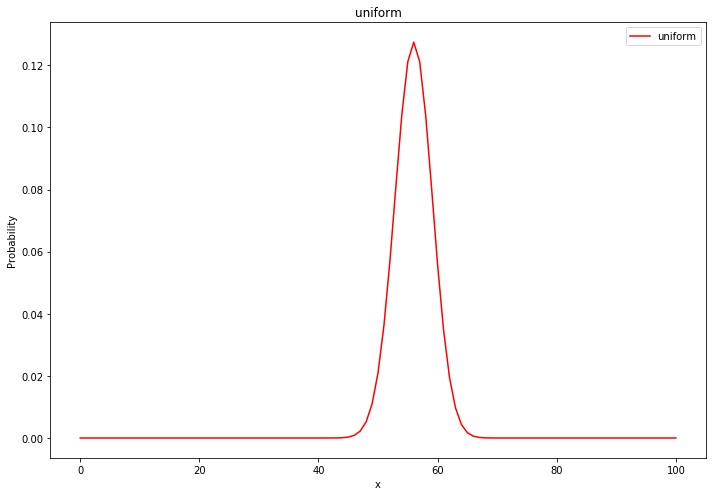

In [21]:
# Makes a Suite with a uniform prior.
suite_1 = Euro(range(0, 101))  # 先验为均匀分布

suite_1.name = 'uniform'


RunUpdate(suite_1)


# 画图
Plot1(suite_1)



# 后验概率


In [22]:
Summarize(suite_1)

x=50的概率: 2.097653%
MLE 56
Mean 平均数:  55.952380952380956
Median 中位数:  56
5th %ile  51
95th %ile  61
CI 置信区间:  (51, 61)


# 先验概率的湮没

In [24]:
def TrianglePrior():
    """Makes a Suite with a triangular prior."""
    suite = Euro()
    for x in range(0, 51):
        suite.Set(x, x)
    for x in range(51, 101):
        suite.Set(x, 100-x) 
    suite.Normalize()
    return suite

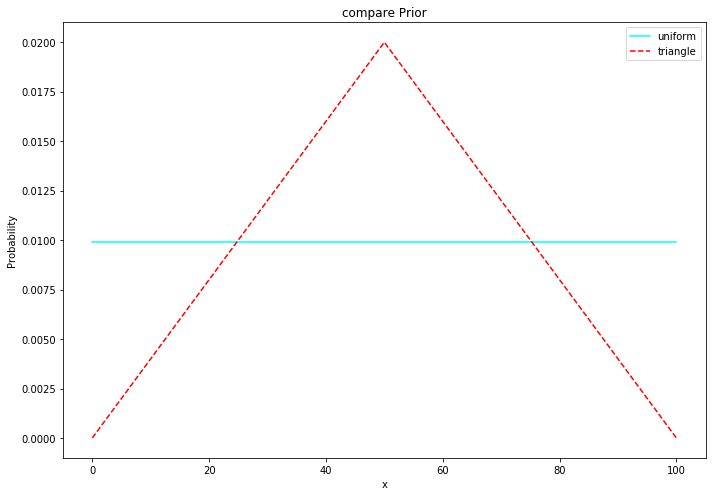

In [25]:
suite_1 = Euro(range(0, 101))  # 先验为均匀分布
suite_1.name = 'uniform'

suite_2 = TrianglePrior()
suite_2.name = 'triangle'

Plot_s([suite_1, suite_2], name="compare Prior")

先验为uniform :
x=50的概率: 2.097653%
MLE 56
Mean 平均数:  55.952380952380956
Median 中位数:  56
5th %ile  51
95th %ile  61
CI 置信区间:  (51, 61)
-----------------
先验为triangle :
x=50的概率: 2.384754%
MLE 56
Mean 平均数:  55.74349943859506
Median 中位数:  56
5th %ile  51
95th %ile  61
CI 置信区间:  (51, 61)


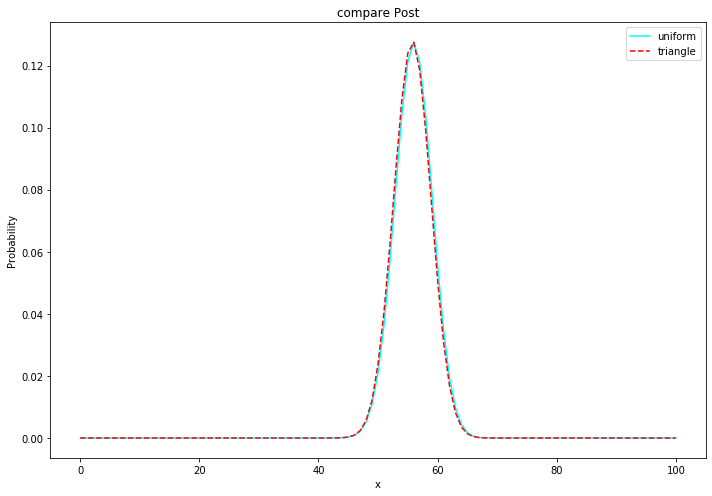

In [27]:
print('先验为uniform :')
RunUpdate(suite_1)
Summarize(suite_1)

print('-----------------')
print('先验为triangle :')
RunUpdate(suite_2)
Summarize(suite_2)

Plot_s([suite_1, suite_2], name="compare Post")

这就是**先验湮没**的一个例子：如果有足够的数据，即使在先验分布上持有不同观点，人们也会得到趋于收敛的后验概率。

# 优化


In [35]:
class Euro2(Euro):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer value of x, the probability of heads (0-100)
        data: tuple of (number of heads, number of tails)
        """
        
        x = hypo / 100.0
        heads, tails = data
        like = x**heads * (1-x)**tails
        return like


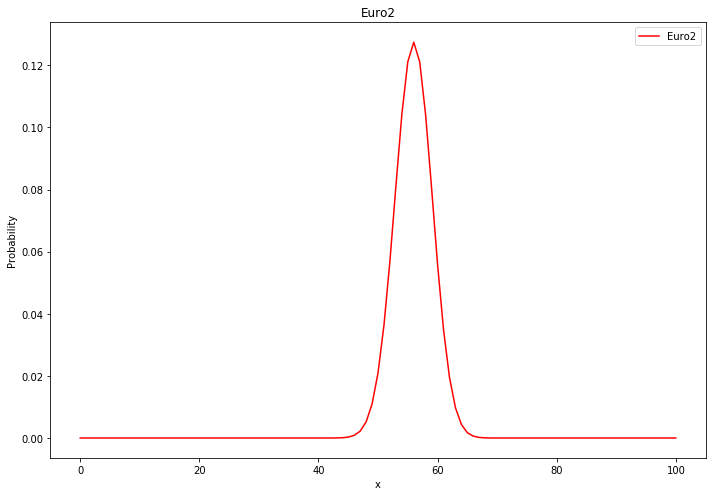

In [36]:
suite = Euro2(range(0, 101))
suite.name = 'Euro2'
heads, tails = 140, 110

suite.Update((heads, tails))

# 画图
Plot1(suite)

## Beta 分布